CSMODEL Group 5 Members:
*  Marian Ricci Ariaga (Marian)
*  Rizza Mikaella Chan (Rizza)
*  Dana Louise Guillarte (Dana)
*  Samantha Erica O'Neil (Sam)
*  Chrysille Grace So (Chrysille)



# Dataset Description
**About the Dataset**

This dataset, sourced from Kaggle, offers comprehensive insights into **video game sales and ratings**, combining data from VGChartz and Metacritic. It encompasses information on video games with sales surpassing 100,000 copies, providing a rich array of details vital to understanding the gaming industry landscape.

**Data Collection Process**

The data collection process for this dataset involved a combination of web scraping and manual data entry. Initially sourced from VGChartz and Metacritic, the dataset was compiled by Rush Kirubi, with additional year of release values manually entered for games lacking this information. The original dataset was expanded from its limited subset of video game platforms. However, it's important to note that not all games listed have complete information on Metacritic, resulting in missing values within the dataset. Additionally, inspiration for this data set came from Gregory Smith who originally scraped the data from VGChartz.

**Dataset Structure**  
15 columns, 17416 rows   
**Name** - String - No null values  
**Platform** - String - 1 null value  
**Year of Release** - Integer - 8 null values   
**Genre** - String - No null values  
**Publisher** - String - No null values  
**NA Sales** - Float - No null values  
**EU Sales** - Float - No null values  
**JP Sales** - Float - No null values  
**Other Sales** - Float - No null values  
**Global Sales** - Float - No null values  
**Critic Score** - Integer - 9080 null values  
**Critic Count** - Integer - 9080 null values  
**User Score** - Float - 9618 null values  
**User Count** - Integer - 9618 null values  
**Rating** - String - 7164 null values  


**Variables Description**

There are 15 variables that are included in this dataset. The fields include:
- **Name** - Name of the game
- **Platform** - Platform of the game's release
- **Year of Release** - Year of the game's release
- **Genre** - Genre of the game
- **Publisher** - Publisher of the game
- **NA Sales** - Sales in North America (in millions)
- **EU Sales** - Sales in Europe (in millions)
- **JP Sales** - Sales in Japan (in millions)
- **Other Sales** - Sales in the rest of the world (in millions)
- **Global Sales** - Total worldwide sales (in millions)
- **Critic Score** - Aggregate score compiled by Metacritic staff
- **Critic Count** - Number of critics that make up the Critic Score
- **User Score** - Score by Metacritic's subscribers
- **User Count** - Number of users who gave the user score
- **Rating** - The ESRB (Entertainment Software Rating Board) Rating

# Data Cleaning

Data cleaning includes implementing various functions to the dataframe in order to improve the accuracy of statistical tests.

In [ ]:
import pandas as pd
import numpy as np
import statistics

# Load the dataset
videogames_df = pd.read_csv("Video_Game_Sales.csv")

In [ ]:
videogames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [ ]:
videogames_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

From the code segment below, we can see that the data set contains a wide range of information, without first cleaning the dataFrame it will be more difficult to conclude things from various tests.

In [ ]:
print(videogames_df['Platform'].unique())
print(len(videogames_df['Publisher'].unique()))
print(videogames_df['Publisher'].value_counts())

['Wii' 'NES' 'G' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'X' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
628
Electronic Arts                 1380
Activision                      1005
Namco Bandai Games               972
Ubisoft                          970
Konami Digital Entertainment     865
                                ... 
Vap                                1
TYO                                1
Navarre Corp                       1
Pow                                1
Team Meat                          1
Name: Publisher, Length: 627, dtype: int64


**Checking for NaN values**


---


Checking for NaN values during data preprocessing is critical to ensuring the dataset's accuracy and integrity. NaN values, often known as missing values, can have a substantial impact on the outcomes of analyses or models if not handled correctly.

In this case, we're checking to see whether there are any missing values across the dataset, ensuring that all columns are complete. If there are any missing values, we eliminate the related observations entirely.

Furthermore, by capping the observations at 1000, we limit the dataset size for future study. This can be useful for a variety of reasons, including lowering computational complexity, increasing processing performance, or narrowing the study to a specific group of data.

In [ ]:
videogames_df.isnull().any()

Name               False
Platform           False
Year_of_Release     True
Genre              False
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Rating              True
dtype: bool

In [ ]:
nan_variables = videogames_df.columns[videogames_df.isnull().any()].tolist()
print(nan_variables)
print(videogames_df[nan_variables].isnull().sum())
print(videogames_df.shape)

['Year_of_Release', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
Year_of_Release       8
Publisher             1
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64
(17416, 15)


In [ ]:
exclude_variables = ['Year_of_Release', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
dropped_variables = list(set(nan_variables) - set(exclude_variables))
videogames_cdf = videogames_df.dropna(subset=dropped_variables).head(1000)
videogames_cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1000 non-null   object 
 1   Platform         1000 non-null   object 
 2   Year_of_Release  1000 non-null   float64
 3   Genre            1000 non-null   object 
 4   Publisher        1000 non-null   object 
 5   NA_Sales         1000 non-null   float64
 6   EU_Sales         1000 non-null   float64
 7   JP_Sales         1000 non-null   float64
 8   Other_Sales      1000 non-null   float64
 9   Global_Sales     1000 non-null   float64
 10  Critic_Score     676 non-null    float64
 11  Critic_Count     676 non-null    float64
 12  User_Score       695 non-null    float64
 13  User_Count       695 non-null    float64
 14  Rating           706 non-null    object 
dtypes: float64(10), object(5)
memory usage: 117.3+ KB


**Removing existing NaN values**


---

`['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']`

In [ ]:
# Make a copy of the dataFrame
vgcopy = videogames_df.copy()

Double checking if each column has `null` values

In [ ]:
print(vgcopy['Year_of_Release'].isnull().any())
print(vgcopy['Publisher'].isnull().any())
print(vgcopy['Critic_Score'].isnull().any())
print(vgcopy['Critic_Count'].isnull().any())
print(vgcopy['User_Score'].isnull().any())
print(vgcopy['User_Count'].isnull().any())
print(vgcopy['Rating'].isnull().any())

True
True
True
True
True
True
True


Using the `dropna` function to remove rows with null values

In [ ]:
vgcopy.dropna(subset=['Year_of_Release', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'], inplace=True)

Checking for `NaN` values again

In [ ]:
print(vgcopy['Year_of_Release'].isnull().any())
print(vgcopy['Publisher'].isnull().any())
print(vgcopy['Critic_Score'].isnull().any())
print(vgcopy['Critic_Count'].isnull().any())
print(vgcopy['User_Score'].isnull().any())
print(vgcopy['User_Count'].isnull().any())
print(vgcopy['Rating'].isnull().any())

False
False
False
False
False
False
False


# Exploratory Data Analysis

## Summary Statistics

This section will include general information and frequency statistics on the variables in the dataset. The content will include as follows:
- Number of Unique Video Game Titles
- Number of Video Game Titles per Platform
- Number of Video Game Releases throughout the Years
- Number of Video Game Titles per Genre
- Top 10 Publishers by Number of Games Pubished
- Distribution of Critic Scores
- Distribution of User Scores
- Distribution of Video Game Titles by Rating
- Distribution of Global Sales Across Genres
- Sales Variation Across Regions
- Sales Variation Across ESRB Ratings
- Outliers in Sales & Scores

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

***Number of Unique Video Game Titles***

This statistic represents the count of unique video game titles within the dataset. It's important to note that the dataset accounts for various platforms on which each title is released. Therefore, there may be multiple entries for the same title, each corresponding to a different platform.

In [ ]:
name_count_df = vgcopy['Name'].nunique()
print("Number of Unique Video Game Titles:", name_count_df)

Number of Unique Video Game Titles: 4524


***Number of Video Game Titles per Platform***

This statistic represents the distribution of video game titles across different gaming platforms within the dataset. By examining the number of video game titles per platform, this statistic offers valuable insights into the platform diversity, market dynamics, and consumer preferences within the gaming industry.

Text(0.5, 1.0, 'Video Game Titles per Platform')

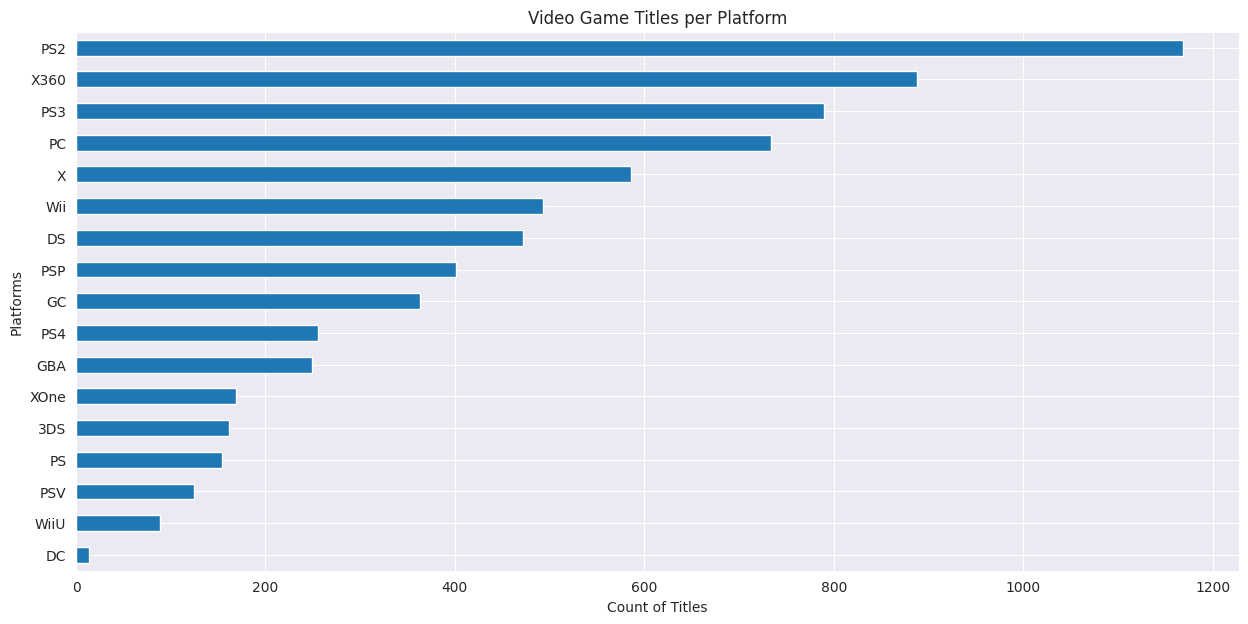

In [ ]:
platform_count_df = vgcopy['Platform'].value_counts()
platform_count_df

platform_count_df.plot.barh(figsize=(15,7)).invert_yaxis()
plt.xlabel('Count of Titles')
plt.ylabel('Platforms')
plt.title('Video Game Titles per Platform')

***Number of Video Game Releases throughout the Years***

This histogram visualizes the distribution of video game releases across different years. By examining the count of titles within each year, we gain insights into the historical trends and evolution of the gaming industry.

Text(0.5, 1.0, 'Number of Video Game Releases throughout the Years')

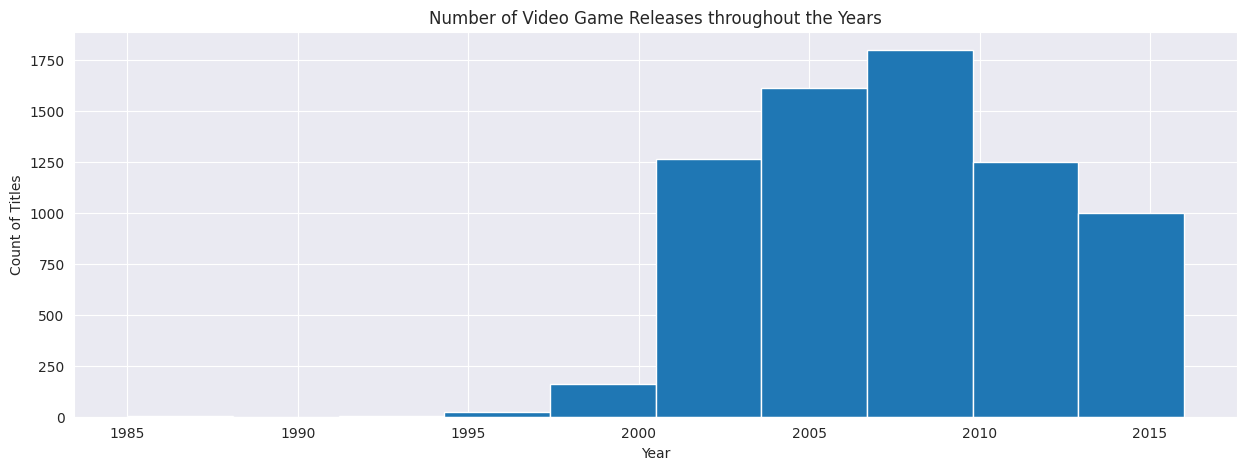

In [ ]:
vgcopy.hist("Year_of_Release", edgecolor='w', figsize=(15, 5))
plt.xlabel('Year')
plt.ylabel('Count of Titles')
plt.title('Number of Video Game Releases throughout the Years')

***Count of Video Game Titles per Genre***

This graph provides an overview of the distribution of video game titles across different genres. Each bar represents the count of titles within a specific genre, offering insights into the diversity and popularity of gaming genres.

Text(0.5, 1.0, 'Number of Video Game Titles per Genre')

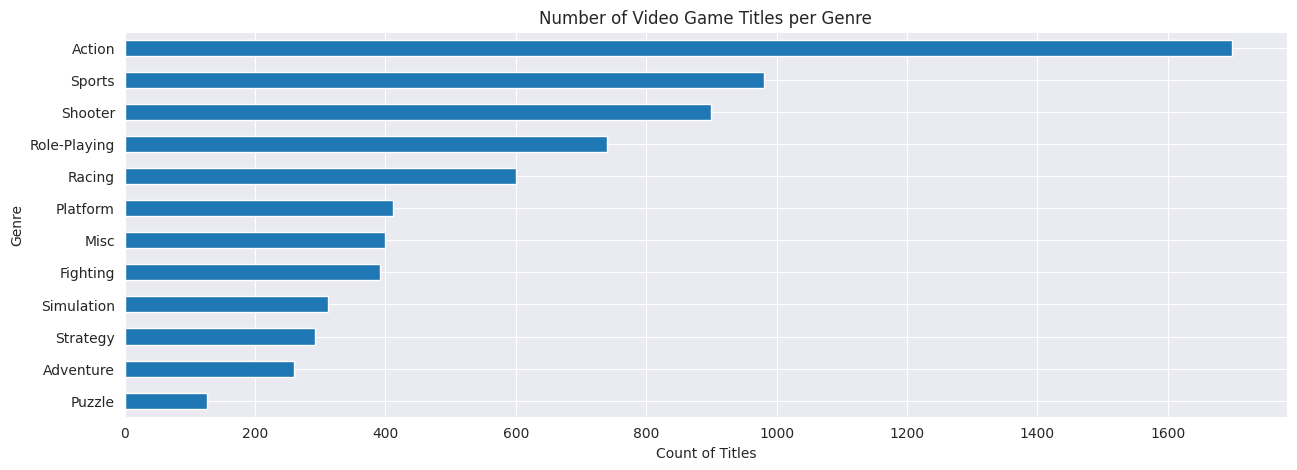

In [ ]:
genre_count_df = vgcopy['Genre'].value_counts()
genre_count_df

genre_count_df.plot.barh(figsize=(15,5)).invert_yaxis()
plt.xlabel('Count of Titles')
plt.ylabel('Genre')
plt.title('Number of Video Game Titles per Genre')

***Top 10 Publishers by Number of Games Published***

This graph showcases the top 10 publishers in the dataset, ranked by the number of games they've published. By focusing on industry leaders, it offers insights into major players shaping the gaming landscape. The simplified visualization streamlines complex data, providing a clear snapshot of publisher dominance within the industry.

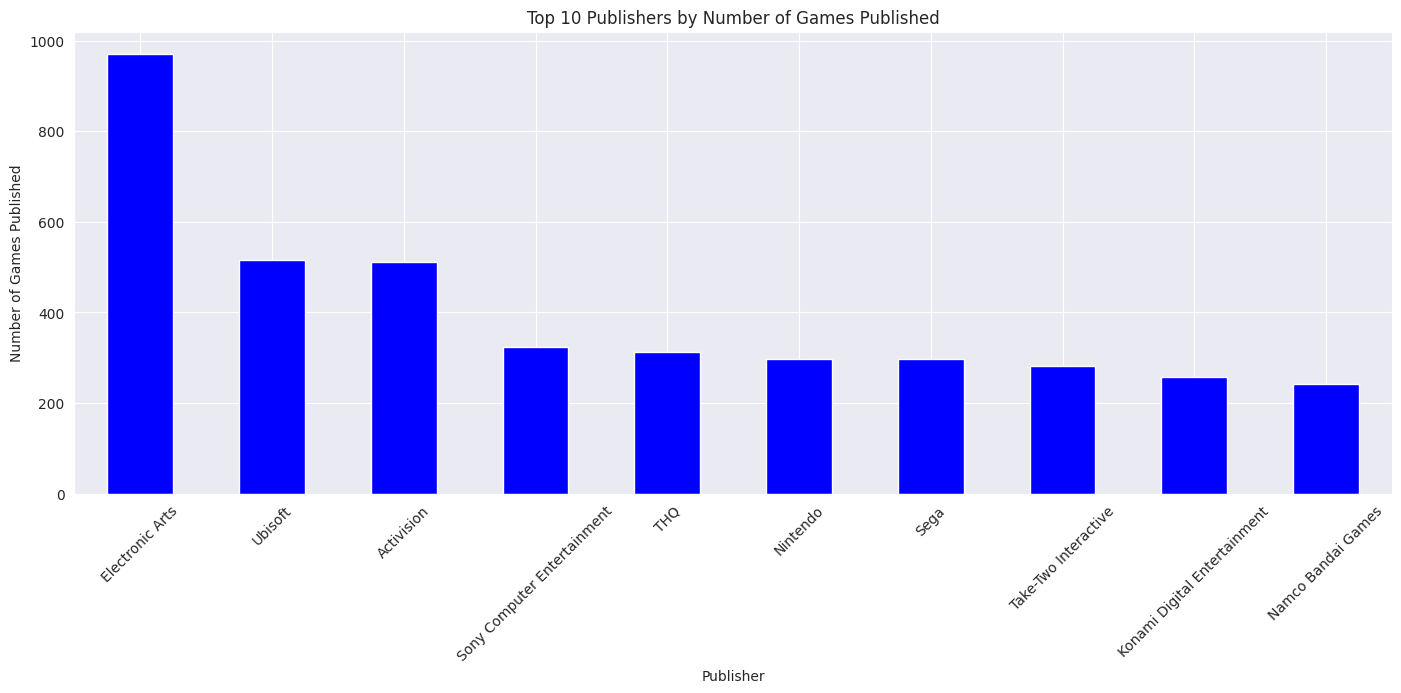

In [ ]:
# Get the count of occurrences for each publisher
publisher_count_df = vgcopy['Publisher'].value_counts()

# Select the top 10 publishers by game count
top_publishers = publisher_count_df.head(10)

# Plotting the bar graph
plt.figure(figsize=(17, 6))
top_publishers.plot(kind='bar', color='blue')
plt.title('Top 10 Publishers by Number of Games Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Published')
plt.xticks(rotation=45)
plt.show()

***Distribution of Critic Scores***

This histogram illustrates the distribution of critic scores for video games within the dataset. The x-axis represents the critic score, while the y-axis indicates the count of titles. By visualizing the distribution of scores, this graph provides insights into the critical reception of video games, offering a snapshot of their overall quality and acclaim within the gaming community.

Text(0.5, 1.0, 'Distribution of Critic Scores for Video Games')

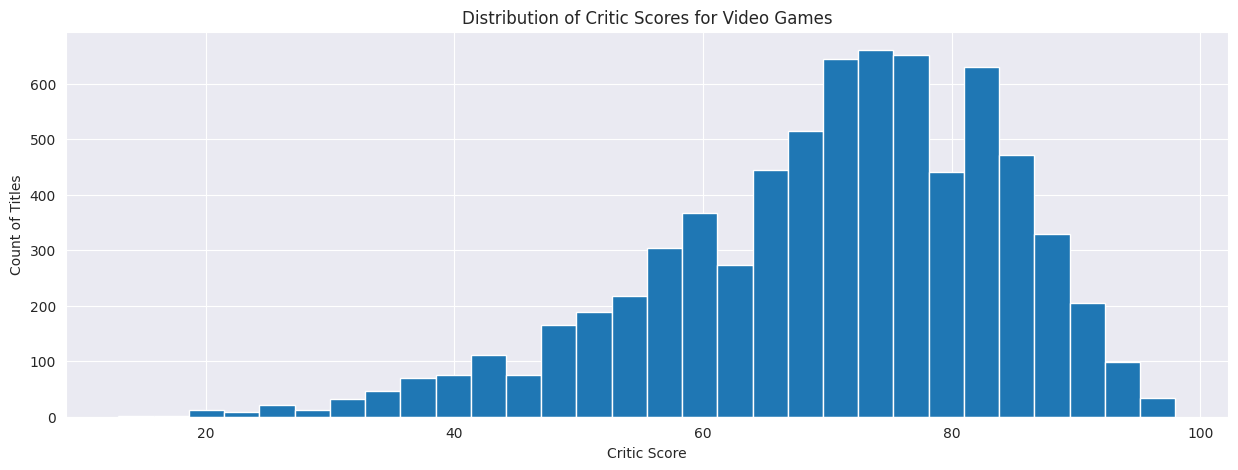

In [ ]:
vgcopy.hist("Critic_Score", bins=30, edgecolor='w', figsize=(15, 5))
plt.xlabel('Critic Score')
plt.ylabel('Count of Titles')
plt.title('Distribution of Critic Scores for Video Games')

***Distribution of User Scores***

This histogram depicts the distribution of user scores for video games within the dataset. The x-axis represents the user score, while the y-axis indicates the count of titles. By visualizing the distribution of scores, this graph offers insights into user perceptions and opinions of video games, providing a glimpse into the overall satisfaction and reception among gamers.

Text(0.5, 1.0, 'Distribution of User Scores for Video Games')

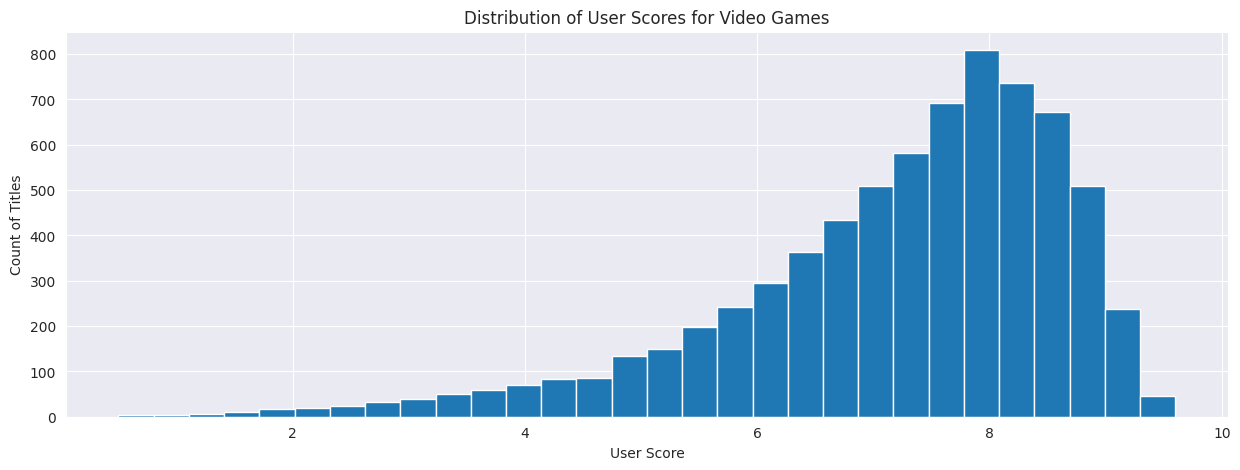

In [ ]:
vgcopy.hist("User_Score", bins=30, edgecolor='w', figsize=(15, 5))
plt.xlabel('User Score')
plt.ylabel('Count of Titles')
plt.title('Distribution of User Scores for Video Games')

***Distribution of Video Game Titles by Rating***

This graph illustrates the distribution of video game titles based on their rating within the dataset. By visualizing the distribution, this graph offers insights into the prevalence of different rating classifications among video game titles, providing an overview of their content and suitability for different audiences.

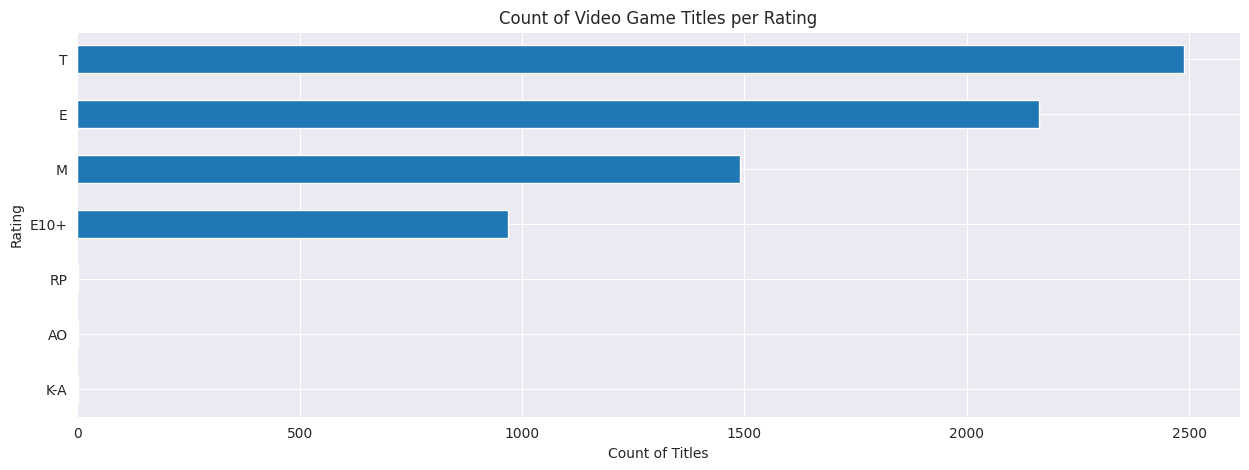

In [ ]:
# Get the count of occurrences for each rating
rating_count_df = vgcopy['Rating'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(15, 5))
rating_count_df.plot(kind='barh')
plt.xlabel('Count of Titles')
plt.ylabel('Rating')
plt.title('Count of Video Game Titles per Rating')
plt.gca().invert_yaxis()
plt.show()

### **EDA Key Question 1**

**Q: What are the trends in video game releases over the years, and how do these releases vary across different platforms, genres, and ratings?**

A: The analysis illustrates an increase in video game releases with a few fluctuations, with a notable dominance of platforms such as PlayStation and Xbox. While action, sports, and shooter genres remain popular, there's a diverse range of genres contributing to the market. Major publishers like EA, Ubisoft, and Activision lead in game creation. Most games cater to a teenage audience, with 'T for Teen' titles. Reviews from both critics and users generally reflect positive sentiments, indicating widespread acclaim and satisfaction within the gaming community

***Distribution of Global Sales Across Genres***

This graph illustrates the distribution of global sales across different genres for video games in the dataset.

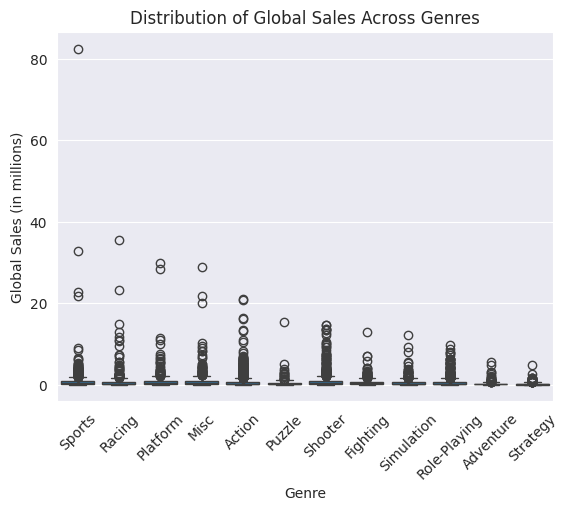

In [ ]:
# Distribution of global sales across genres
sns.boxplot(x='Genre', y='Global_Sales', data=vgcopy)
plt.title('Distribution of Global Sales Across Genres')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

### **EDA Key Question 2**

**Q: What is the distribution of global sales across genres?**

A: The distribution of global sales across genres varies significantly. Certain genres, such as Action, Sports, and Shooter, tend to have higher total global sales compared to others like Adventure and Strategy. Understanding the distribution of global sales across genres provides insights into consumer preferences and market demand for different types of games. This information can help game developers and publishers allocate resources effectively, prioritize game development efforts, and tailor marketing strategies to target specific genres with higher sales potential.

***Sales Variation Across Regions***

This graph illustrates the distribution of sales across different regions for video games in the dataset.

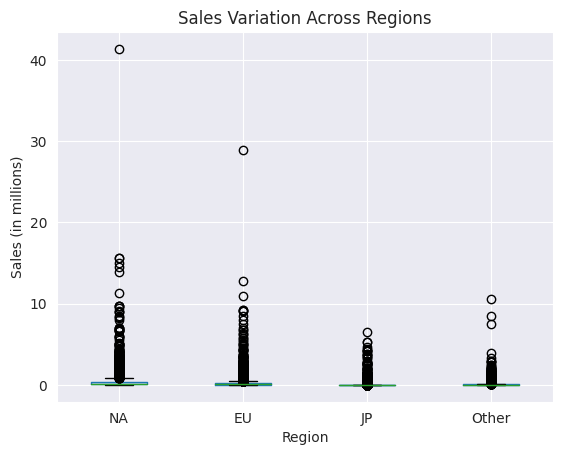

In [ ]:
# Sales variation across regions
region_sales = vgcopy[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_sales.boxplot()
plt.title('Sales Variation Across Regions')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.xticks([1, 2, 3, 4], ['NA', 'EU', 'JP', 'Other'])
plt.show()

### **EDA Key Question 3**

**Q: How do sales vary across regions?**

A: Sales vary across regions, with North America typically accounting for the highest total sales, followed by Europe, Japan, and other regions. This pattern may reflect differences in gaming preferences, market size, and consumer behavior in each region. Understanding the sales variation across regions is crucial for game developers and publishers to tailor their marketing strategies, localize content, and target specific audiences effectively. By analyzing regional sales trends, stakeholders can identify lucrative markets, optimize distribution channels, and maximize revenue potential in different parts of the world.

***Sales Variation Across ESRB Ratings***

This graph illustrates the distribution of sales across different ESRB ratings for video games in the dataset.

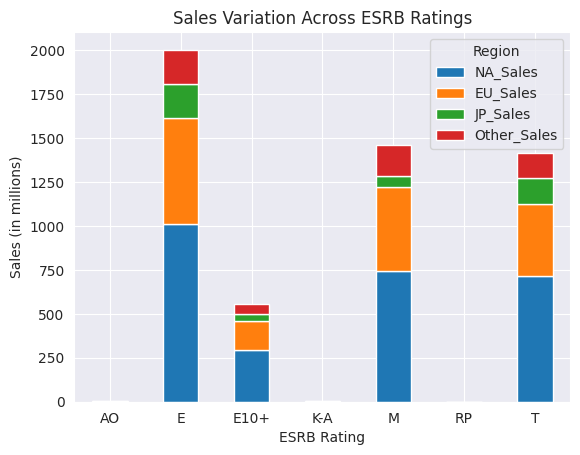

In [ ]:
# Sales variation across ESRB ratings
esrb_sales = vgcopy.groupby('Rating')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
esrb_sales.plot(kind='bar', stacked=True)
plt.title('Sales Variation Across ESRB Ratings')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=0)
plt.show()

### **EDA Key Question 4**

**Q: How do sales vary based on the ESRB ratings?**

A: Sales vary based on ESRB ratings, with games rated 'E' (Everyone) having the highest total sales, followed by 'M' (Mature), then 'T' (Teen). Conversely, games rated 'AO' (Adults Only) and 'K-A' (Kids to Adults) exhibit the lowest total sales. The low sales of 'AO'-rated games are likely due to their limited target audience, given their explicit content intended for adults. Similarly, the decline in sales for 'K-A'-rated games can be attributed to the replacement of this rating with 'E' in the late '90s, aligning with evolving industry standards and preferences.

***Outliers in Sales & Scores***

This graph illustrates the distribution of sales and scores for video games in the dataset.

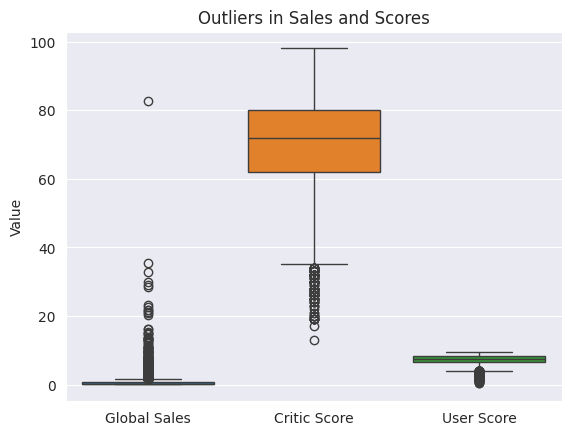

In [ ]:
# Detecting outliers in sales and scores
sns.boxplot(data=vgcopy[['Global_Sales', 'Critic_Score', 'User_Score']])
plt.title('Outliers in Sales and Scores')
plt.ylabel('Value')
plt.xticks([0, 1, 2], ['Global Sales', 'Critic Score', 'User Score'])
plt.show()

### **EDA Key Question 5**

**Q: Are there any outliers in terms of sales or scores?**

A: There are outliers in both sales and scores. Some games have exceptionally high sales compared to the majority of games, while others have unusually low sales. Similarly, there are games with extremely high or low critic and user scores compared to the typical range of scores.

## Computing for the Measures of Central Tendency & Dispersion


To determine the pertinent data in this dataset, we must compute measures of central tendency and dispersion for specific elements that make sense in real life. These measurements aid in understanding the normal behavior and variability of the data, which is critical for making educated decisions and forming meaningful conclusions.

***Global Sales Statistics***

The research of global sales figures provides critical insights into video game performance and trends on a global scale. We gain a comprehensive understanding of the distribution by examining metrics such as the average (mean) global sales, median global sales, mode (most frequent) global sales, standard deviation (a measure of dispersion indicating how much the sales typically deviate from the average), range (the difference between the maximum and minimum sales values), and quartiles.

Understanding these numbers enables us to discover typical sales trends, evaluate the overall market success of video games, and uncover potential outliers or anomalies that warrant additional examination. Furthermore, studying global sales information allows us to make informed judgments about marketing strategies, investment prospects, and the general trajectory of the video game business on a worldwide scale.

In [ ]:
# Calculate statistics for global sales
global_sales_stats = vgcopy['Global_Sales'].agg([
    'mean',                                 # Mean
    'median',                               # Median
    lambda x: x.mode()[0],                  # Mode
    'std',                                  # Standard deviation
    'min',                                  # Minimum
    'max',                                  # Maximum
    lambda x: x.quantile(0.25),             # First quartile
    lambda x: x.quantile(0.5),              # Second quartile
    lambda x: x.quantile(0.75)              # Third quartile
])

print("Global Sales Statistics:")
print(global_sales_stats)

Global Sales Statistics:
mean         0.765307
median       0.290000
<lambda>     0.020000
std          1.936692
min          0.010000
max         82.540000
<lambda>     0.110000
<lambda>     0.290000
<lambda>     0.742500
Name: Global_Sales, dtype: float64


**Q: What is the average (mean) global sales of video games?**

A: 0.7653 (in millions).

**Q: What is the middle value (median) of global sales?**

A: 0.2900 (in millions).

**Q: Which global sales value occurs most frequently (mode)?**

A: 0.0200 (in millions).

**Q: How much do global sales typically deviate from the average (standard deviation)?**

A: 1.9366 (in millions).

**Q: What is the range of global sales values?**

A: 0.0100 to 82.5400 (in millions).

**Q: What are the quartiles of global sales, indicating the spread of sales across different percentiles?**

A: Q1 is 0.1100 (in millions), Q2 (median) is 0.2900 (in millions), and Q3 is 0.7425 (in millions).

**Q: Is the distribution of global sales positively or negatively skewed?**

A: The distribution of global sales is positively skewed because the mean is larger than the median.

***Regional Sales Statistics***


Analyzing regional sales statistics provides valuable insights into the distribution and performance of video games across different geographic regions. By examining metrics such as the average (mean) sales in North America, Europe, Japan, and other regions, median sales in each region, mode (most frequent) sales value per region, standard deviation (a measure of dispersion indicating how much the sales typically deviate from the average) for each region, range (the difference between the maximum and minimum sales values) of sales values in each region, and quartiles (which divide the data into four equal parts, indicating the spread of sales across different percentiles) for each region, we gain a comprehensive understanding of the variability and trends in regional sales figures.

Understanding these facts enables us to detect consumer behavior trends in various locations, assess the relative popularity of video games across regional marketplaces, and modify marketing strategies and distribution methods to maximize sales potential in certain areas. Furthermore, evaluating regional sales information allows us to discover developing markets, assess the impact of cultural preferences on sales patterns, and make sound decisions about worldwide expansion and localization efforts in the video game industry.

In [ ]:
# Calculate statistics for regional sales
regional_sales_stats = vgcopy[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg([
    'mean',                                 # Mean
    'median',                               # Median
    lambda x: x.mode()[0],                  # Mode
    'std',                                  # Standard deviation
    'min',                                  # Minimum
    'max',                                  # Maximum
    lambda x: x.quantile(0.25),             # First quartile
    lambda x: x.quantile(0.5),              # Second quartile
    lambda x: x.quantile(0.75)              # Third quartile
])
print("Regional Sales Statistics:")
print(regional_sales_stats)

Regional Sales Statistics:
           NA_Sales   EU_Sales  JP_Sales  Other_Sales
mean       0.388567   0.232537  0.062652     0.081347
median     0.150000   0.060000  0.000000     0.020000
<lambda>   0.000000   0.000000  0.000000     0.010000
std        0.953982   0.680028  0.283475     0.265864
min        0.000000   0.000000  0.000000     0.000000
max       41.360000  28.960000  6.500000    10.570000
<lambda>   0.060000   0.020000  0.000000     0.010000
<lambda>   0.150000   0.060000  0.000000     0.020000
<lambda>   0.390000   0.202500  0.010000     0.070000


**Q: What is the average (mean) sales of video games per region?**

A:
North America - 0.3885 (in millions).

Europe - 0.2325 (in millions).

Japan - 0.0626 (in millions).

Others - 0.0813 (in millions).

**Q: What is the middle value (median) of sales of video games per region?**

A: North America - 0.1500 (in millions).

Europe - 0.0600 (in millions).

Japan - 0.0000 (in millions).

Others - 0.0200 (in millions).

**Q: Which sales value per region occurs most frequently (mode)?**

A: North America - 0.0000 (in millions).

Europe - 0.0000 (in millions).

Japan - 0.0000 (in millions).

Others - 0.0100 (in millions).

**Q: How much do sales  per region typically deviate from the average (standard deviation)?**

A: North America - 0.9539 (in millions).

Europe - 0.6800 (in millions).

Japan - 0.2834 (in millions).

Others - 0.2658 (in millions).

**Q: What is the range of sales values per region?**

A: North America - 0.0000 to 41.3600 (in millions).

Europe - 0.0000 to 28.9600 (in millions).

Japan - 0.0000 to 6.5000 (in millions).

Others - 0.0000 to 10.5700 (in millions)

**Q: What are the quartiles of regional sales, indicating the spread of sales across different percentiles?**

A: North America - Q1 is 0.0600, Q2 is 0.1500, and Q3 is 0.3900 respectively all in millions.

Europe - Q1 is 0.0200, Q2 is 0.0600, and Q3 is 0.2025 respectively all in millions.

Japan - Q1 is 0.0000, Q2 is 0.0000, and Q3 is 0.0100 respectively all in millions.

Others - Q1 is 0.0100, Q2 is 0.0200, and Q3 is 0.0700 respectively all in millions.

**Q: Is the distribution of regional sales positively or negatively skewed?**

A: The distribution of all regional sales is positively skewed because the means are larger than the medians.

***ESRB Rating Mode***

Analyzing the mode of ESRB ratings reveals the most common content rating given to video games in the dataset. By determining the mode (the most commonly occurring value) of ESRB ratings, we acquire insight about the most common content rating applied to video games in the data. This information is critical for many players in the gaming business, including developers, publishers, and consumers.

Furthermore, examining the mode of ESRB ratings can reveal broader patterns in the video game industry, such as changes in content preferences over time or disparities in content ratings across genres or platforms. This data can help industry stakeholders understand developing trends and forecast changes in consumer behavior and regulatory needs.

In [ ]:
# Filter out missing values and calculate mode for ESRB ratings
mode_esrb_rating = vgcopy['Rating'].mode()[0]  # Mode for ESRB ratings excluding missing values

print("Mode ESRB Rating:", mode_esrb_rating)

Mode ESRB Rating: T


**Q: What is the most common ESRB rating assigned to video games in the dataset?**

A: The most common ESRB rating assigned to video games in the dataset is 'T'.

**Understanding Statistical Measures: Mean and Median**

In statistical analysis, choosing the right measure of central tendency is critical for effectively summarizing and interpreting data. The mean and median are the most commonly used measurements of central tendency. The median reflects the middle value when data is ordered in ascending order, whereas the mean represents the average value of a dataset.


**When to Use the Median?**

When the distribution of data values is skewed or there are obvious outliers, the median is the best choice. Skewness arises when the data is not symmetrically distributed, with a longer tail on one side. In such instances, extreme values, or outliers, can have a considerable impact on the mean, dragging it in their direction and producing a less representative estimate of central tendency. The median, on the other hand, is less affected by outliers and provides a more dependable approximation of the central value.

**Application to Our Analysis:**

In our research of the greatest median values across several categories, such as sales, scores, and counts, we must take into account how these metrics are distributed between platforms and publishers. By focusing on the highest median values, we want to discover platforms and publishers that consistently outperform, regardless of any outliers or skewed distributions. This method enables us to identify patterns and trends that would not be visible when utilizing the mean, providing significant insights into the gaming market landscape.

***Highest Median Per Sales According to Platform***

Analyzing the highest median sales per platform provides insights into the distribution of sales across different gaming platforms.

In [ ]:
# Platform with the highest median global sales
median_global_sales_per_platform = vgcopy.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False)
print("Platform with the highest median global sales:", median_global_sales_per_platform.idxmax())

# Platform with the highest median North American sales
median_na_sales_per_platform = vgcopy.groupby('Platform')['NA_Sales'].median().sort_values(ascending=False)
print("Platform with the highest median North American sales:", median_na_sales_per_platform.idxmax())

# Platform with the highest median European sales
median_eu_sales_per_platform = vgcopy.groupby('Platform')['EU_Sales'].median().sort_values(ascending=False)
print("Platform with the highest median European sales:", median_eu_sales_per_platform.idxmax())

# Platform with the highest median Japanese sales
median_jp_sales_per_platform = vgcopy.groupby('Platform')['JP_Sales'].median().sort_values(ascending=False)
print("Platform with the highest median Japanese sales:", median_jp_sales_per_platform.idxmax())

# Platform with the highest median sales in Other regions
median_other_sales_per_platform = vgcopy.groupby('Platform')['Other_Sales'].median().sort_values(ascending=False)
print("Platform with the highest median Other region sales:", median_other_sales_per_platform.idxmax())

Platform with the highest median global sales: PS
Platform with the highest median North American sales: Wii
Platform with the highest median European sales: PS3
Platform with the highest median Japanese sales: DC
Platform with the highest median Other region sales: PS3


**Q: What platform has the highest median global sales?**

A: PS

**Q: What platform has the highest median sales in North America?**

A: Wii

**Q: What platform has the highest median sales in Europe?**

A: PS3

**Q: What platform has the highest median sales in Japan?**

A: DC

**Q: What platform has the highest median sales in other regions?**

A: PS3

***Highest Median Per Sales According to Publisher***

Analyzing the highest median sales per publisher provides insights into the distribution of sales across different publishing companies.

In [ ]:
# Publisher with the highest median global sales
median_global_sales_per_publisher = vgcopy.groupby('Publisher')['Global_Sales'].median().sort_values(ascending=False)
print("Publisher with the highest median global sales:", median_global_sales_per_publisher.idxmax())

# Publisher with the highest median North American sales
median_na_sales_per_publisher = vgcopy.groupby('Publisher')['NA_Sales'].median().sort_values(ascending=False)
print("Publisher with the highest median North American sales:", median_na_sales_per_publisher.idxmax())

# Publisher with the highest median European sales
median_eu_sales_per_publisher = vgcopy.groupby('Publisher')['EU_Sales'].median().sort_values(ascending=False)
print("Publisher with the highest median European sales:", median_eu_sales_per_publisher.idxmax())

# Publisher with the highest median Japanese sales
median_jp_sales_per_publisher = vgcopy.groupby('Publisher')['JP_Sales'].median().sort_values(ascending=False)
print("Publisher with the highest median Japanese sales:", median_jp_sales_per_publisher.idxmax())

# Publisher with the highest median sales in Other regions
median_other_sales_per_publisher = vgcopy.groupby('Publisher')['Other_Sales'].median().sort_values(ascending=False)
print("Publisher with the highest median Other region sales:", median_other_sales_per_publisher.idxmax())

Publisher with the highest median global sales: SquareSoft
Publisher with the highest median North American sales: RedOctane
Publisher with the highest median European sales: Russel
Publisher with the highest median Japanese sales: SquareSoft
Publisher with the highest median Other region sales: Hello Games


**Q: What publisher has the highest median global sales?**

A: SquareSoft

**Q: What publisher has the highest median sales in North America?**

A: RedOctane

**Q: What publisher has the highest median sales in Europe?**

A: Russel

**Q: What publisher has the highest median sales in Japan?**

A: SquareSoft

**Q: What publisher has the highest median sales in other regions?**

A: Hello Games

***Highest Median Per Score According to Platform***

Analyzing the highest median score per platform provides insights into the quality and reception of games on different gaming platforms.

In [ ]:
# Platform with the highest median user_score
median_user_score_per_platform = vgcopy.groupby('Platform')['User_Score'].median().sort_values(ascending=False)
print("Platform with the highest median user score:", median_user_score_per_platform.idxmax())

# Platform with the highest median critic_score
median_critic_score_per_platform = vgcopy.groupby('Platform')['Critic_Score'].median().sort_values(ascending=False)
print("Platform with the highest median critic score:", median_critic_score_per_platform.idxmax())

Platform with the highest median user score: DC
Platform with the highest median critic score: DC


**Q: What platform has the highest median user score?**

A: DC

**Q: What platform has the highest median critic score**

A: DC

***Highest Median Per Count According to Platform***

Analyzing the highest median count per platform provides insights into the level of user engagement and the volume of critic reviews for games on different gaming platforms.

In [ ]:
# Platform with the highest median user_count
median_user_count_per_platform = vgcopy.groupby('Platform')['User_Count'].median().sort_values(ascending=False)
print("Platform with the highest median user count:", median_user_count_per_platform.idxmax())

# Platform with the highest median critic_count
median_critic_count_per_platform = vgcopy.groupby('Platform')['Critic_Count'].median().sort_values(ascending=False)
print("Platform with the highest median critic count:", median_critic_count_per_platform.idxmax())

Platform with the highest median user count: PC
Platform with the highest median critic count: X360


**Q: What platform has the highest median user count?**

A: PC

**Q: What platform has the highest median critic count**

A: X360

***Highest Median Per Score According to Publisher***

Analyzing the highest median score per publisher provides insights into the quality and reception of games published by different companies.

In [ ]:
# Publisher with the highest median user_score
median_user_score_per_publisher = vgcopy.groupby('Publisher')['User_Score'].median().sort_values(ascending=False)
print("Publisher with the highest median user score:", median_user_score_per_publisher.idxmax())

# Publisher with the highest median critic_score
median_critic_score_per_publisher = vgcopy.groupby('Publisher')['Critic_Score'].median().sort_values(ascending=False)
print("Publisher with the highest median critic score:", median_critic_score_per_publisher.idxmax())

Publisher with the highest median user score: Square
Publisher with the highest median critic score: Valve


**Q: What publisher has the highest median user score?**

A: Square

**Q: What publisher has the highest median critic score**

A: Valve

***Highest Median Per Count According to Publisher***

Analyzing the highest median count per publisher provides insights into the level of user engagement and the volume of critic reviews for games published by different companies.

In [ ]:
# Publisher with the highest median user_count
median_user_count_per_publisher = vgcopy.groupby('Publisher')['User_Count'].median().sort_values(ascending=False)
print("Publisher with the highest median user count:", median_user_count_per_publisher.idxmax())

# Publisher with the highest median critic_count
median_critic_count_per_publisher = vgcopy.groupby('Publisher')['Critic_Count'].median().sort_values(ascending=False)
print("Publisher with the highest median critic count:", median_critic_count_per_publisher.idxmax())

Publisher with the highest median user count: Hello Games
Publisher with the highest median critic count: Hello Games


**Q: What publisher has the highest median user count?**

A: Hello Games

**Q: What publisher has the highest median critic count**

A: Hello Games

##Correlational Analysis
**Pearson's correlation** will be used for this section. Due to the lack of rank and possible "ties" in data entries, Spearman's correlation is not applicable to this data set.



 ***Seaborn Library***


Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is built on top of matplotlib and closely integrated with pandas data structures, making it particularly useful for visualizing datasets stored in pandas DataFrames.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Creating the Correlation Matrix
The necessary column should be decided prior to the creation of the correlation matrix. Since correlation tests can only be applied to continuous data, categorical columns have been excluded from the selection of columns.

In [ ]:
#columns containing numerical data are placed in an array
columns_for_correlation = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

#correlation matrix (Pearson's) is generated
correlation_matrix = vgcopy[columns_for_correlation].corr()
correlation_matrix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
NA_Sales,1.000000,0.838223,0.465930,0.727575,0.954936,0.234142,0.286298,0.085729,0.245816
EU_Sales,0.838223,1.000000,0.518536,0.718245,0.938461,0.211855,0.267728,0.055010,0.284431
JP_Sales,0.465930,0.518536,1.000000,0.393503,0.611947,0.145799,0.171109,0.127092,0.073678
Other_Sales,0.727575,0.718245,0.393503,1.000000,0.805426,0.191452,0.241974,0.056737,0.242044
Global_Sales,0.954936,0.938461,0.611947,0.805426,1.000000,0.237317,0.293247,0.087918,0.264916
Critic_Score,0.234142,0.211855,0.145799,0.191452,0.237317,1.000000,0.391951,0.583724,0.264328
Critic_Count,0.286298,0.267728,0.171109,0.241974,0.293247,0.391951,1.000000,0.193658,0.361137
User_Score,0.085729,0.055010,0.127092,0.056737,0.087918,0.583724,0.193658,1.000000,0.018876
User_Count,0.245816,0.284431,0.073678,0.242044,0.264916,0.264328,0.361137,0.018876,1.000000


### Correlation Visualization
To efficiently visualize the entire correlation matrix, we can utilize a heatmap. This approach captures every entry in the matrix and provides a clearer visualization of the strength of each relationship.

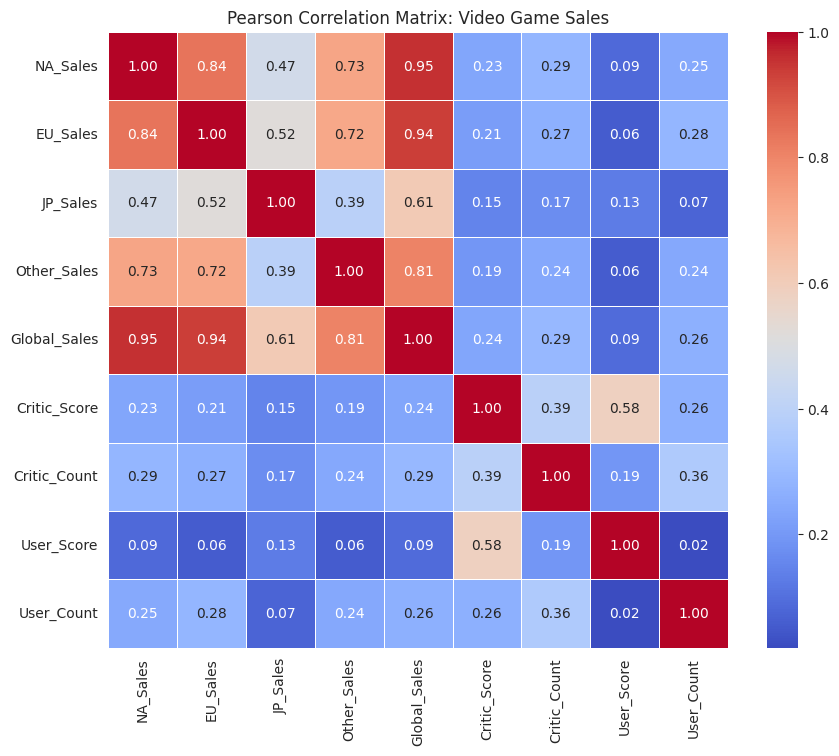

In [ ]:
#using matplotlib and seaborn to create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix: Video Game Sales')
plt.show()

**We can further analyze the relationships of the following variable pairs:**

* Global Sales and Critic Scores
* Global Sales and User Scores
* Critic Count and User Count
* Critic Scores and User Scores

***Correlation Between the User Score and Global Sales of a Game***

The Pearson's coefficient 0.087918 and the scatterplot below suggests that there is a ***very weak positive linear relationship*** between user score and global sales.

Text(0.5, 1.0, 'Relationship of User Score and Global Sales')

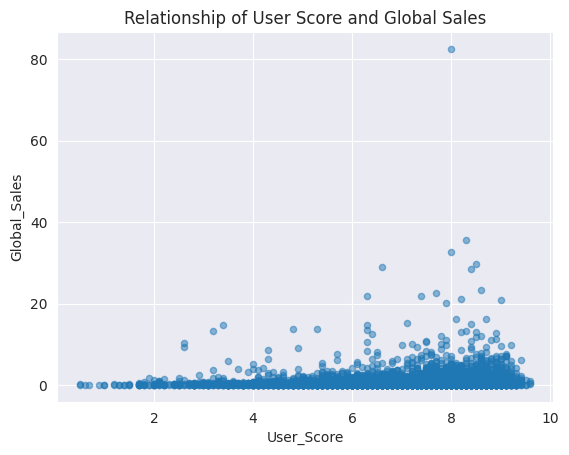

In [ ]:
vgcopy.plot.scatter(x='User_Score', y='Global_Sales', alpha=0.5)
plt.title('Relationship of User Score and Global Sales')

***Correlation Between the Critic Score and Global Sales of a Game***

The Pearson's coefficient 0.237317 and the scatterplot below suggests that there is a ***weak positive linear relationship*** between critic score and global sales.

Text(0.5, 1.0, 'Relationship of Critic Score and Gobal Sales')

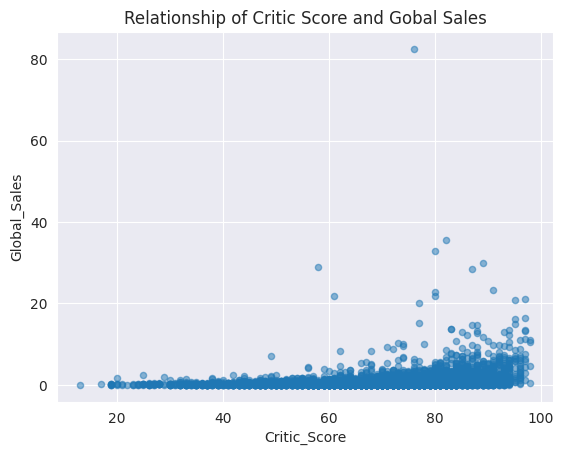

In [ ]:
vgcopy.plot.scatter(x='Critic_Score', y='Global_Sales', alpha=0.5)
plt.title('Relationship of Critic Score and Gobal Sales')

***Correlation Between the Critic Count and User Count of a Game***

The Pearson's coefficient 0.361137 and the scatterplot below suggests that there is a ***moderate positive linear relationship*** between critic count and user count.

Text(0.5, 1.0, 'Relationship of Critic Count and User Count')

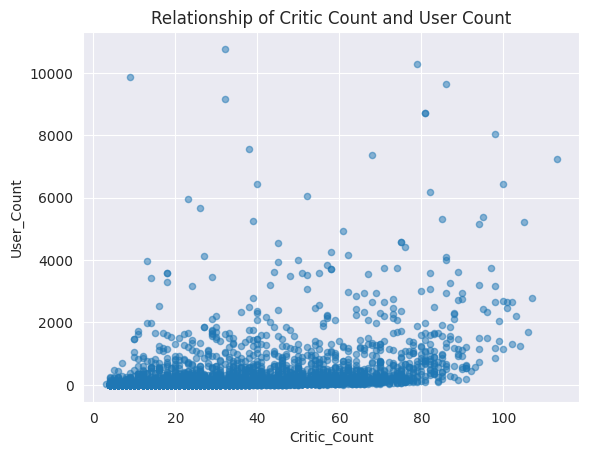

In [ ]:

vgcopy.plot.scatter(x='Critic_Count', y='User_Count', alpha=0.5)
plt.title('Relationship of Critic Count and User Count')

***Correlation Between the Critic Score and User Score of a Game***

The Pearson's coefficient 0.583724 and the scatterplot below suggests that there is a ***moderately strong positive linear relationship*** between user score and critic score.

Text(0.5, 1.0, 'Relationship of Critic Score and User Score')

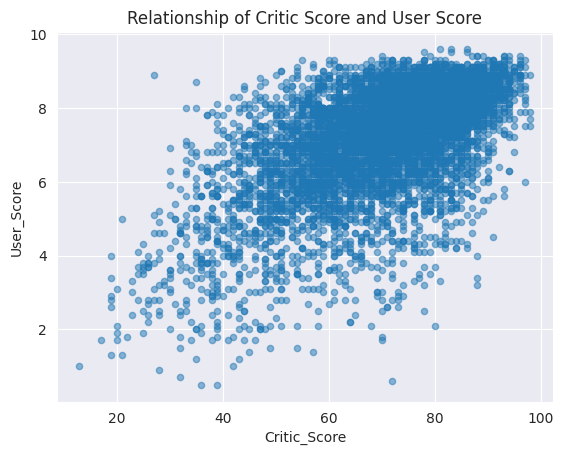

In [ ]:
vgcopy.plot.scatter(x='Critic_Score', y='User_Score', alpha=0.5)
plt.title('Relationship of Critic Score and User Score')

### **EDA Key Question 6**

**Q: Which variable-pair relationship is most noteworthy?**

A: The relationship between the critic score and user score of a game is worth taking note of, due to it's strength. The correlation coefficient denotes that the critic score is directly proportional to the user score. In a real-world setting, this information would matter in terms of a game's quality perception, development, and more.

# Research Question

### How do various factors, such as platform, genre, publisher, critic and user scores, and ESRB rating, correlate to the success of video games, as measured by global sales over the past decade?

**Explanation:**

The dataset's exploratory data analysis (EDA) revealed useful insights into the links between numerous parameters such as platform, genre, publisher, reviewer and user scores, and ESRB rating, as well as their impact on video game success, as measured by global sales over the last decade. Examining these relationships allows us to obtain a better knowledge of the elements that influence the commercial performance of video games in the market.

**Importance & Significance:**

This research question is important for various reasons:


- Industry Insights: Understanding how different factors impact the success of video games can provide valuable insights for game developers, publishers, and marketers. By analyzing the relationships between factors such as platform, genre, and critic/user scores with global sales, stakeholders can make informed decisions regarding game development, marketing strategies, and investment opportunities.
- Consumer Preferences: Investigating the influence of factors like genre, platform, and ratings on global sales can help identify trends and preferences among consumers. This knowledge allows developers to tailor their offerings to better meet the demands of their target audience, potentially leading to higher sales and improved market penetration.
- Strategic Decision-Making: By discerning the factors that contribute most significantly to the success of video games, industry players can formulate strategic plans to maximize their competitive advantage. This may involve focusing resources on genres or platforms with higher sales potential, partnering with publishers known for successful releases, or targeting specific demographic segments based on ESRB ratings preferences.

**Data Mining Techniques:**

The research question is highly suitable for data mining techniques and domain-specific data modeling techniques. Here's how it can be answered using various methods:

- Association Rule Mining: This technique can be employed to discover relationships between different factors (platform, genre, publisher, critic and user scores, ESRB rating) and the success of video games measured by global sales. Association rule mining can uncover patterns such as "video games of a certain genre are more likely to achieve high global sales when published by specific publishers."

- Clustering: Clustering techniques can group video games based on similarities in the identified factors (platform, genre, publisher, critic and user scores, ESRB rating), allowing for the identification of clusters of successful games with similar characteristics.

- Regression Analysis: Regression models can be utilized to quantify the impact of each factor on global sales while controlling for other variables. This approach allows for the determination of which factors have a statistically significant influence on the success of video games.

- Text Mining (for ESRB Ratings): Text mining techniques can be applied to analyze the textual descriptions of ESRB ratings, converting them into numerical features for further analysis. This enables the incorporation of ESRB ratings into quantitative models.

- Time-Series Analysis: If data is available over multiple years, time-series analysis can be used to examine trends in global sales over the past decade. This technique can help identify patterns and seasonality in video game sales, providing valuable insights into the factors influencing long-term success.



